Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Проект состоит из 2-х частей:
- формирование SQL-запросов
- анализ с помощью python

Описание данных

База данных об авиаперевозках:
Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта,
- airport_name — название аэропорта,
- city — город,
- timezone — часовой пояс.

Таблица aircrafts — информация о самолётах:
- aircraft_code — код модели самолёта,
- model — модель самолёта,
- range — дальность полётов.

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета,
- passenger_id — уникальный идентификатор пассажира,
- passenger_name — имя и фамилия пассажира.

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса,
- departure_airport — аэропорт вылета,
- departure_time — дата и время вылета,
- arrival_airport — аэропорт прилёта,
- arrival_time — дата и время прилёта,
- aircraft_code — уникальный идентификатор самолёта.

Таблица ticket_flights — стыковая таблица «рейсы-билеты»:
- ticket_no — номер билета,
- flight_id — уникальный идентификатор рейса.

Таблица festivals — информация о фестивалях:
- festival_id — уникальный номер фестиваля,
- festival_date — дата проведения фестиваля,
- festival_city — город проведения фестиваля,
- festival_name — название фестиваля.

Схема таблиц
https://disk.yandex.ru/i/J9hpVKky4TP9Rw



## SQL-запросы

## Анализ с помощью python

Необходимо изучить базы данных и проанализировать спрос пассажиров авиакомпании F9 на рейсы в города России.
Имеются 2 таблицы:

1) Данные с количеством рейсов для каждой модели самолетов в сентябре 2018 года

2) Данные со средним количестве рейсов, прибывающих в города за день в августе 2018 года

Задачи для анализа:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [1]:
#импортируем библиотеки
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt


models = pd.read_csv('/datasets/query_1.csv')
data = pd.read_csv('/datasets/query_3.csv')

display(models)
display('Всего рейсов: ', models['flights_amount'].sum())
display(models.info())

display(data.head())
display('Всего рейсов: ', data['average_flights'].sum() * 30)
display(data.info())
data['average_flights'].describe()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


'Всего рейсов: '

16285

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


'Всего рейсов: '

16647.39301509205

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Данные на первый взгляд выглядят корректно. 

Теперь выберем топ-10 городов по среднему количеству рейсов.

In [2]:
top10 = data.sort_values(by = 'average_flights', ascending = False).head(10)
display(top10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим график с количеством рейсов на каждую модель самолетов.

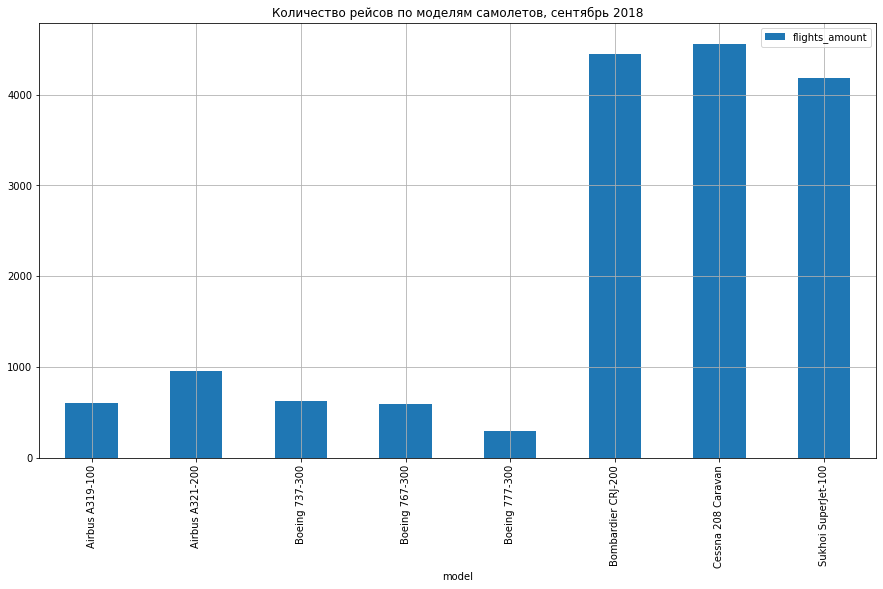

In [3]:
models.plot(x='model', y='flights_amount', kind='bar', style='o',figsize=(15,8), grid=True, title='Количество рейсов по моделям самолетов, сентябрь 2018')
plt.show()

Здесь бросается в глаза то, что самое большое количество рейсов у казалось бы немассовых моделей Бомбардье, Цесна и Сухой Суперджет. И эти модели точно не случайны здесь, т.к. количество рейсов из первой и второй таблицы примерно одинаковы, это не ошибка. 

Вероятно, в статистику попали мелкие авиакомпании, которые осуществляют авиаперевозки по коротким маршрутам, где большие суда не требуются либо аэропорт не позволяет таких принять. 

Далее построим график городов и количества рейсов.

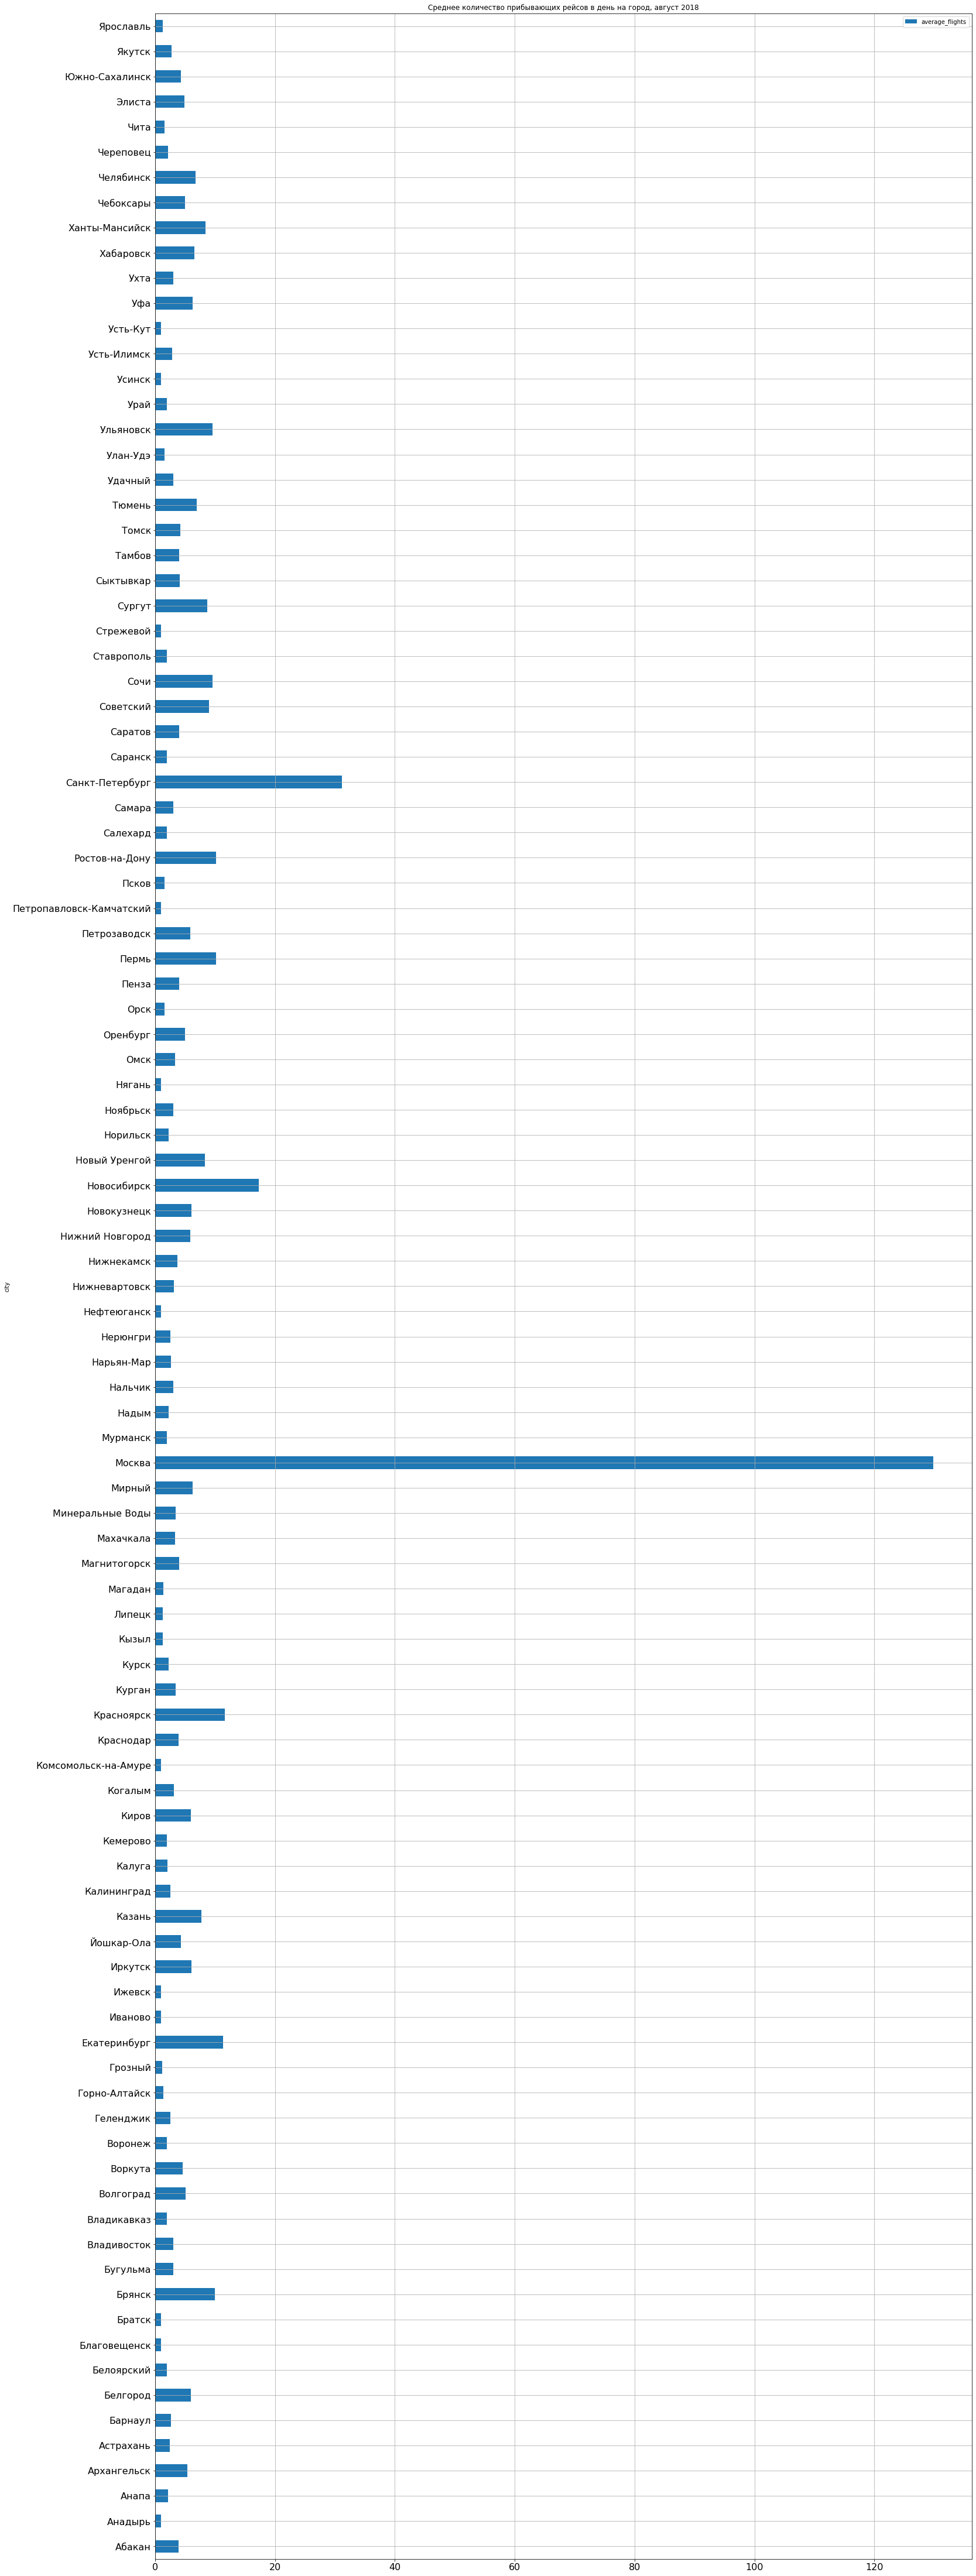

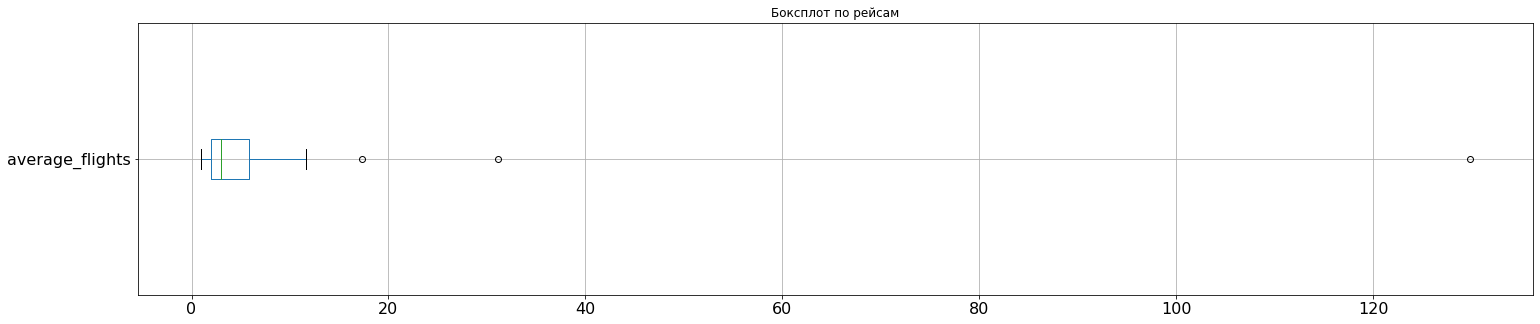

In [4]:
data.plot(x='city', y='average_flights', kind='barh', figsize=(25,80), grid=True, title='Среднее количество прибывающих рейсов в день на город, август 2018')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

plt.figure(figsize=(25,5))
plt.title('Боксплот по рейсам')
data.boxplot(column='average_flights', vert = False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

На графике конечно же выделяется Москва, принимающая примерно 130 рейсов в день. Хотя там, в отличие от других городов, не один аэропорт, а три, то в среднем на один выходит по 43, что все равно больше любого другого города. У всех остальных городов кроме Питера и Новосибирска относительно скромная статистика: у всех полетная активность менее 10 рейсов в день, медианное значение 3 рейса. На глазах очевидный перекос перемещений в 3 города на 140-миллионную страну.

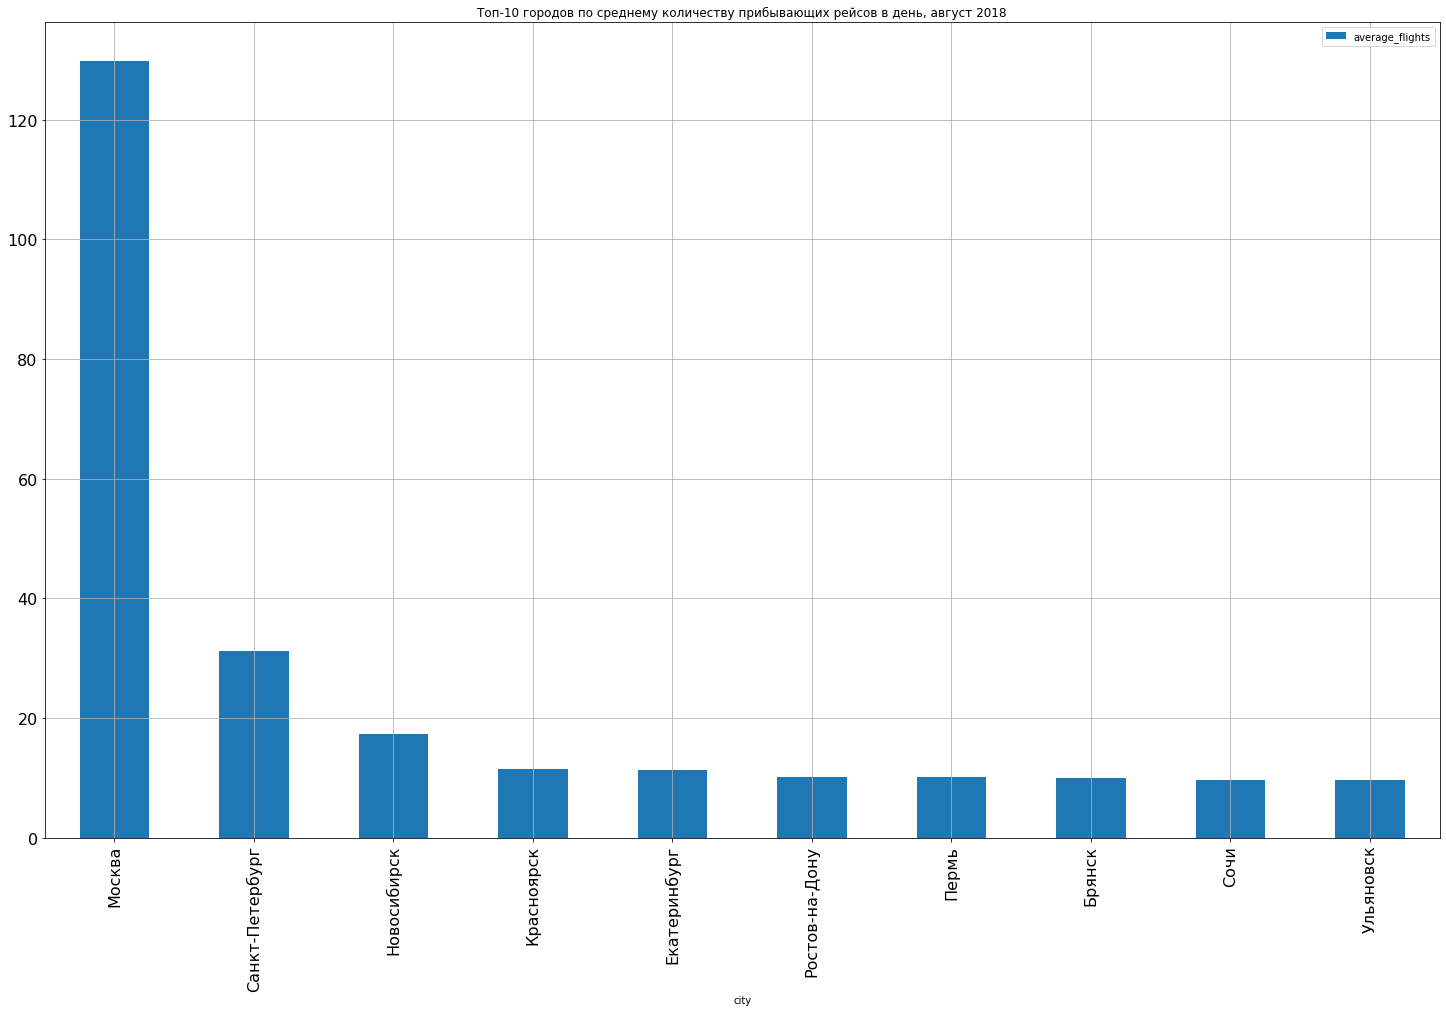

In [5]:
top10.plot(x='city', y='average_flights', kind='bar', figsize=(25,15), grid=True, title='Топ-10 городов по среднему количеству прибывающих рейсов в день, август 2018')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

В графике топ-10 городов Москва занимает первое место по очевидным причинам: столица страны, самый большой и густонаселенный город, а также основной транспортных хаб для внутренних и международных рейсов, в котором располагаются 3 международных аэропорта.

Второе место занимает Санкт-Петербург, второй по населению город, который также в хорошую погоду очень привлекательный для туристов, как российских, так и иностранных, поэтому в другое время года вероятно туда летает на порядок меньше рейсов.

Третье место занимает Новосибирск, третий по густонаселенности российский город. На его высокую строчку в топе повлияло не только количество населения, но и великолепный международный аэропорт Толмачево, который может принять воздушные суда любого размера и является транспортным хабом для большинства популярных туристических направлений.

Далее практически с идентичными показателями идут Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск. Хотя логично предположить, что летом в Сочи пассажиропоток должен увеличится, однако в августе 2018 туда летало рейсов не больше, чем в Брянск.